<a href="https://colab.research.google.com/github/stac-bot/Pytorch-for-Deep-Learning/blob/main/PyTorch_worklfow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
# nn contains all of pytorch's building blocks for neural networks
from torch import nn 
import matplotlib.pyplot as plt
import numpy as np
# check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing the data)

In [ ]:
# y = a + bx
weight = 0.7
bias = 0.3

# create 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

## Ler's create training and test set with our data.


In [ ]:
# create a train/test split(training test)
train_split = int(0.8*len(X))
X_train, X_test = X[:train_split], X[train_split:] # X train/test
y_train, y_test = y[:train_split], y[train_split:] # y train/test

len(X_train), len(X_test) ,len(y_train), len(y_test)

(40, 10, 40, 10)

## how might better visualize the data

In [ ]:
def plot_prediction(train_data=X_train, 
                     train_labels= y_train,
                     test_labels = X_test,
                     test_data = y_test,predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_labels, c='b',s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4,label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # plot the prediction if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predicitons')

  #show legends
  plt.legend(prop={"size":14});



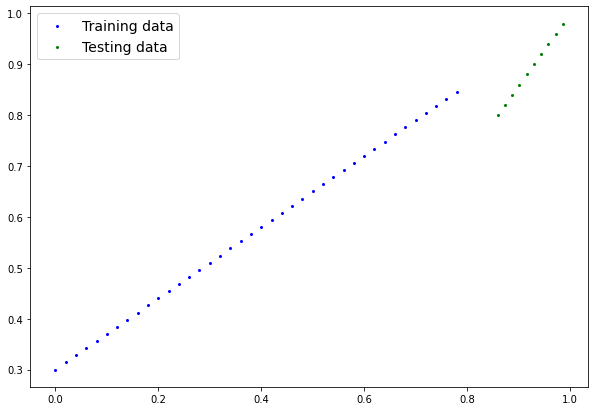

In [ ]:
plot_prediction();

## 2. Build Model

In [ ]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything, sin nn.Module is Base Class for all network modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, 
                               requires_grad=True,
                               dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float))
    # Forward method to define computation in model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear formula

In [ ]:
### Pytorch models eesentials

### ckecking the content of the model

## create random seed
torch.manual_seed(42)

#create an instance of the module
model_01 = LinearRegressionModel()
list(model_01.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

## Making prediction with our Models

In [ ]:
y_test # actual value


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# torch.inference_mode()

# y_test based on X_test
with torch.inference_mode():
  y_preds = model_01(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

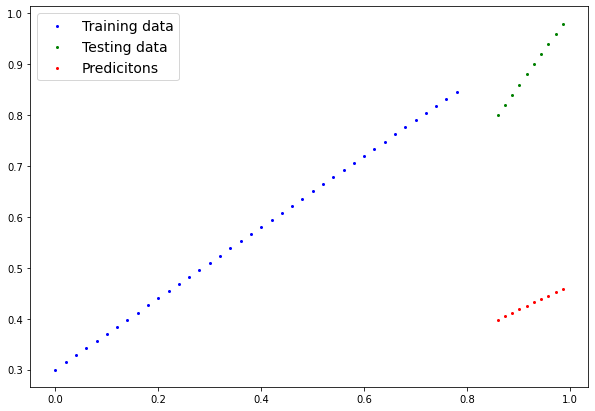

In [ ]:
plot_prediction(predictions=y_preds)

### training a model with PyTorch(intuition building)

** things we need:**
* Loss Function: to measure how wrong your model's prediction is from the ideal
* optimizer: take into account the loss of a model and adjusts the model parameters (e.g weight & bias in our case) to improve the loss function

**And specifially for pytorch, we need**
* A training loop
* A testing loop

In [ ]:
# the whole idea of training is to move the model from unknow pararmeters(these may be random) to known parameters
# and how to measure how wrong the model predictions are to use the loss function
# lost function/ cost fucntion/ criterion
#list(model_01.parameters())

In [ ]:
model_01.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# set up loss function
loss_fn = nn.L1Loss()

# set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_01.parameters(),lr=0.01)

0. loop through the data
1. forward pass to make prediction on data - also called forward propagation
2. calculate the loss
3. Optimizer zero grad 
4. Loss backward ()
5. Optimizer step


In [ ]:
torch.manual_seed(42)
# to reduce the MAE
# building a training loop in pytorh (and a testing loop)
# epoch is one loop through the data... (this is a hyperparameter because we)
# this how the model learns
epochs = 200
## track different values
epoch_count =[]
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # set the model to traing mode
  model_01.train()

  # 1. forward pass
  y_pred  = model_01(X_train)

  #.2 calculate the loss
  loss = loss_fn(y_pred, y_train)
  print("loss:", loss)

  #3. zero the optimizer gradient
  optimizer.zero_grad()
  
  # 4. perform backward propagation
  loss.backward()


  # step the optimizer 
  optimizer.step()
 
  ## testing  code 
  model_01.eval() # turnns off different setting in the model not needed for evaluation
  with torch.inference_mode():
  #1, do the forward pass
    test_pred = model_01(X_test)
  #2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print what's happening
  if epoch % 1==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f'Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}')
    # print out model state_dict()
    print(model_01.state_dict())

loss: tensor(0.3129, grad_fn=<L1LossBackward0>)
Epoch: 0| Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: tensor(0.3014, grad_fn=<L1LossBackward0>)
Epoch: 1| Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss: tensor(0.2898, grad_fn=<L1LossBackward0>)
Epoch: 2| Loss: 0.28983935713768005 | Test loss: 0.4541231691837311
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss: tensor(0.2783, grad_fn=<L1LossBackward0>)
Epoch: 3| Loss: 0.2783183455467224 | Test loss: 0.44065219163894653
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss: tensor(0.2668, grad_fn=<L1LossBackward0>)
Epoch: 4| Loss: 0.26679736375808716 | Test loss: 0.4271811842918396
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss: tensor(0.2553, grad_fn=<L1LossBackward0>)
Epoch: 

In [ ]:
# what is autogration in pytorch??
# learning rate scheduling??
model_01.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# running some prediction
with torch.inference_mode():
  y_pred_new = model_01(X_test)

In [ ]:
weight, bias

(0.7, 0.3)

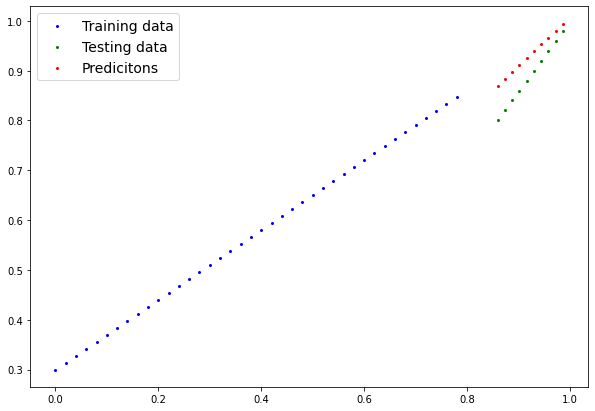

In [ ]:
plot_prediction(predictions=y_pred_new)

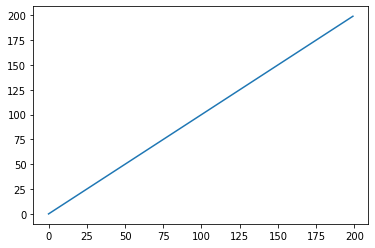

In [ ]:
# plot the loss curves
plt.plot(epoch_count, )

### saving and testing your model


In [ ]:
# 3 methods to save the model
#1. python pickle
#2. torch.load()
#3. torch.nn.Module.load_state_dict()


In [ ]:
# extra
# documentation on saving and Loading Models


In [ ]:
!pip install -I path.py==7.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. SAVE THE MODEL STATE DICT
print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_01.state_dict(),f=MODEL_SAVE_PATH)


saving model to: models/01_pytorch_workflow_model_01.pth


In [ ]:
# loading pytorch model


In [ ]:
# put everything what we have learned till now 


In [ ]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check Pytorch version
torch.__version__

'1.12.1+cu113'

Create device-agnostic code.


 <br>
This means if we've got access to a GPU, our code will use it(for potentially faster computations)
If no GPU is available, the code will default using GPU.

In [ ]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'using device: {device}')

using device: cuda


In [ ]:
!nvidia-smi

Sat Aug 27 14:12:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

6.1 data

In [ ]:
# recreate some data using LR data y = Weight*X + bias

weight = 0.7
bias = 0.3

# create range value
start = 0
step = 0.02
end = 1

# creating X and y
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze error pop up
y = weight*X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train)), print(len(X_test)), print(len(y_train)), print(len(y_test))


40
10
40
10


(None, None, None, None)

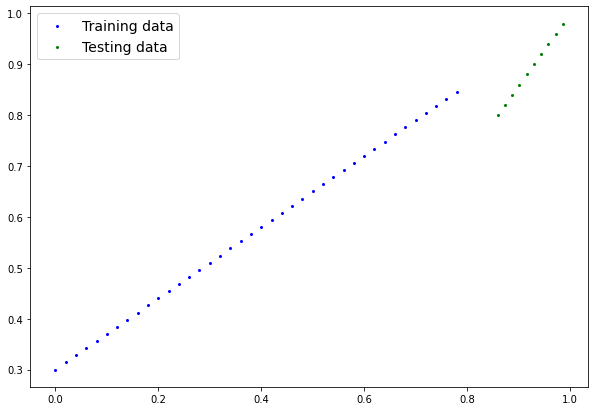

In [ ]:
# plot the data 
plot_prediction(X_train, y_train,X_test, y_test)

## building a Model

**create linear model by subclassing nn.Module**

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters ; linear transform
    # we will always initalize the layer not parameters mostly 
    # using linear layer. perform y = mx + b
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features = 1)
    
    # forward define the computation of model
  def forward(self,x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

step 3 : Training

for training we need:
1. Loss function
2. optimizer
3. Training Loop 
4. Testing Loop

In [ ]:
# set up the loss function
loss_fn = nn.L1Loss() # same MAE

# setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01) 

In [ ]:
# Let's write the training loop 
torch.manual_seed(42)

epochs = 200


# put data on same device 

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. Optimizer step (which way to optimize the parameter)
  optimizer.step()

  # testing 
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)
  # print out what's happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss :{loss} | Test_loss: {test_loss}')





Epoch: 0 | Loss :0.5551779866218567 | Test_loss: 0.5739762187004089
Epoch: 10 | Loss :0.439968079328537 | Test_loss: 0.4392664134502411
Epoch: 20 | Loss :0.3247582018375397 | Test_loss: 0.30455657839775085
Epoch: 30 | Loss :0.20954833924770355 | Test_loss: 0.16984669864177704
Epoch: 40 | Loss :0.09433845430612564 | Test_loss: 0.03513690456748009
Epoch: 50 | Loss :0.023886388167738914 | Test_loss: 0.04784907028079033
Epoch: 60 | Loss :0.019956795498728752 | Test_loss: 0.045803118497133255
Epoch: 70 | Loss :0.016517987474799156 | Test_loss: 0.037530567497015
Epoch: 80 | Loss :0.013089174404740334 | Test_loss: 0.02994490973651409
Epoch: 90 | Loss :0.009653178043663502 | Test_loss: 0.02167237363755703
Epoch: 100 | Loss :0.006215683650225401 | Test_loss: 0.014086711220443249
Epoch: 110 | Loss :0.00278724217787385 | Test_loss: 0.005814164876937866
Epoch: 120 | Loss :0.0012645035749301314 | Test_loss: 0.013801801018416882
Epoch: 130 | Loss :0.0012645035749301314 | Test_loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

making prediction

In [ ]:
model_1.eval()

with torch.inference_mode():
  new_pred = model_1(X_test)

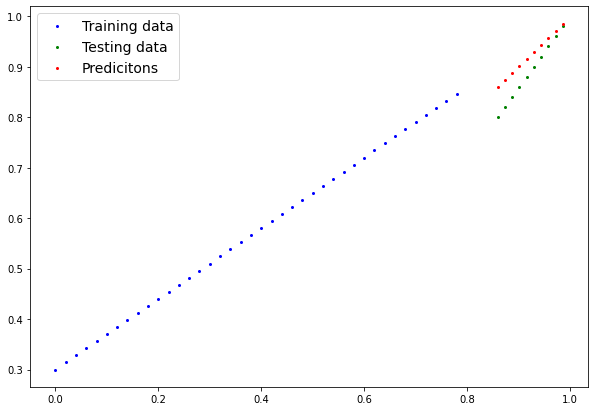

In [ ]:
new_pred = new_pred.cpu()
plot_prediction(predictions=new_pred)

saving and loading model 

In [ ]:
from pathlib import Path

# 1. create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model state path 
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

#3. save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#load model_1
model = LinearRegressionModelV2()
# load the saved model
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
# put the model on the right device
model.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# evaluate loaded model
model.eval()
with torch.inference_mode():
  model_pred = model()




In [ ]:
model_pred == new_pred.to(device)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


there are two primitives to work with data
1. Dataset
2. DataLoader

Pytorch offers domain specific libraries such as `TorchText` `TorchVision` and `TorchAudio` all of which include datasets

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(root = 'data',
                                      train = True,
                                      download = True,
                                      transform = ToTensor(),
                                      )


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# download test set from open datasets
test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download = True,
    transform = ToTensor(),
)